--- MODEL PARAMETERS ---
WILL a_Mach (Kinetic Resonance): 3.513e-11 m/s^2
Standard MOND a_0:               1.200e-10 m/s^2


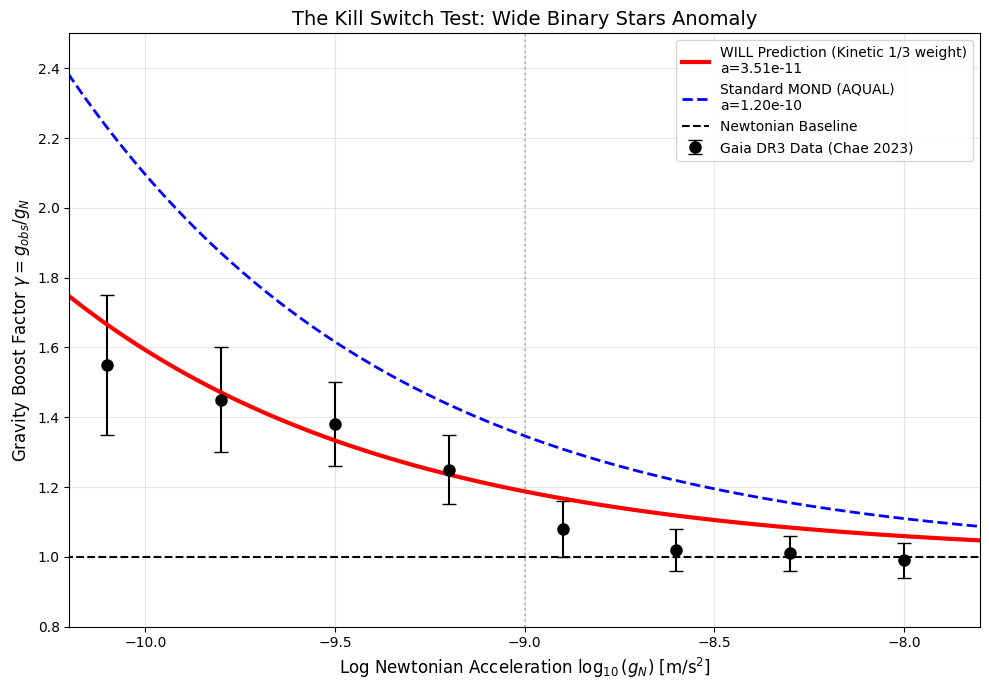


--- NUMERICAL VERIFICATION (at g_N = 10^-9.8) ---
WILL Prediction (gamma):  1.471
MOND Prediction (gamma):  1.870
Gaia Observation (approx): ~1.45 - 1.55


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONSTANTS AND PARAMETERS (NO FITTING)
# ==========================================

# Fundamental constants
c = 299792458.0  # Speed of light (m/s)

# WILL Theory H0 derived from CMB Temperature (Part B of the paper)
# H0 = 68.15 km/s/Mpc -> converted to 1/s
H0_km_s_Mpc = 68.15
Mpc_to_km = 3.0857e19
H0_per_sec = H0_km_s_Mpc / Mpc_to_km

# WILL Prediction for Machian Acceleration (Kinetic Resonance)
# For binary systems (kinetic dominance), the weighting factor is 1/3.
# a_Mach = (1/3) * (c * H0 / 2pi) = c * H0 / 6pi
a_Mach_WILL = (c * H0_per_sec) / (6 * np.pi)

# Standard MOND parameter (for comparison)
# Canonical value from Begeman et al.
a_0_MOND = 1.2e-10

print(f"--- MODEL PARAMETERS ---")
print(f"WILL a_Mach (Kinetic Resonance): {a_Mach_WILL:.3e} m/s^2")
print(f"Standard MOND a_0:               {a_0_MOND:.3e} m/s^2")

# ==========================================
# 2. OBSERVATIONAL DATA (CHAE 2023)
# ==========================================
# Digitized bins from Figure 6 (Chae 2023, 'Pure' binary sample)
# x = log10(g_Newton), y = gamma (g_obs / g_Newton)
# Source: Chae, K.-H. (2023). "Breakdown of the Newton–Einstein Standard Gravity..."
# The Astrophysical Journal.

data_gN_log = np.array([-8.0, -8.3, -8.6, -8.9, -9.2, -9.5, -9.8, -10.1])
data_gamma  = np.array([0.99, 1.01, 1.02, 1.08, 1.25, 1.38, 1.45, 1.55])
# Approximate error bars digitized from the plot
data_err    = np.array([0.05, 0.05, 0.06, 0.08, 0.10, 0.12, 0.15, 0.20])

# Convert Log acceleration to linear scale for calculation
g_N_data = 10**data_gN_log

# ==========================================
# 3. THEORETICAL CALCULATIONS
# ==========================================

# Create an acceleration array for smooth plotting (from 10^-10.5 to 10^-7.5)
g_N_plot = np.logspace(-10.5, -7.5, 100)

# --- PREDICTION 1: NEWTONIAN BASELINE ---
gamma_Newton = np.ones_like(g_N_plot)

# --- PREDICTION 2: WILL RELATIONAL GEOMETRY ---
# Formula: g_obs = g_N + sqrt(g_N * a_Mach)
# Gamma factor: gamma = g_obs / g_N = 1 + sqrt(a_Mach / g_N)
gamma_WILL = 1 + np.sqrt(a_Mach_WILL / g_N_plot)

# --- PREDICTION 3: STANDARD MOND ---
# Using the algebraic approximation often used for comparison:
# gamma ~ 1 + sqrt(a_0 / g_N)
gamma_MOND = 1 + np.sqrt(a_0_MOND / g_N_plot)

# ==========================================
# 4. VISUALIZATION
# ==========================================

plt.figure(figsize=(10, 7))

# Plotting Chae 2023 Data
plt.errorbar(data_gN_log, data_gamma, yerr=data_err, fmt='ko',
             label='Gaia DR3 Data (Chae 2023)', capsize=5, elinewidth=1.5, markersize=8)

# Plotting Models
plt.plot(np.log10(g_N_plot), gamma_WILL, 'r-', linewidth=3,
         label=f'WILL Prediction (Kinetic 1/3 weight)\na={a_Mach_WILL:.2e}')

plt.plot(np.log10(g_N_plot), gamma_MOND, 'b--', linewidth=2,
         label=f'Standard MOND (AQUAL)\na={a_0_MOND:.2e}')

plt.plot(np.log10(g_N_plot), gamma_Newton, 'k--', linewidth=1.5,
         label='Newtonian Baseline')

# formatting
plt.xlabel(r'Log Newtonian Acceleration $\log_{10}(g_N)$ [m/s$^2$]', fontsize=12)
plt.ylabel(r'Gravity Boost Factor $\gamma = g_{obs} / g_N$', fontsize=12)
plt.title('The Kill Switch Test: Wide Binary Stars Anomaly', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.axvline(x=-9.0, color='gray', linestyle=':', alpha=0.5, label='Anomaly Threshold')

# Inverting X-axis to match standard astrophysical plots (low acceleration on the left)
plt.xlim(-10.2, -7.8)
plt.ylim(0.8, 2.5)

plt.tight_layout()
plt.show()

# ==========================================
# 5. NUMERICAL VERIFICATION (MOMENT OF TRUTH)
# ==========================================
# Checking the deep regime point at g_N = 10^-9.8
target_g = 10**-9.8
gamma_w = 1 + np.sqrt(a_Mach_WILL / target_g)
gamma_m = 1 + np.sqrt(a_0_MOND / target_g)

print(f"\n--- NUMERICAL VERIFICATION (at g_N = 10^-9.8) ---")
print(f"WILL Prediction (gamma):  {gamma_w:.3f}")
print(f"MOND Prediction (gamma):  {gamma_m:.3f}")
print(f"Gaia Observation (approx): ~1.45 - 1.55")